In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Definisi variabel input
jumlah_tugas = np.arange(0, 11, 1)  # Jumlah tugas (0-10)
lama_belajar = np.arange(0, 11, 1)  # Lama belajar (0-10 jam)
lama_tidur = np.arange(0, 11, 1)    # Lama tidur (0-10 jam)

In [2]:
# Definisi variabel output (stres)
stres = np.arange(0, 101, 1)  # Tingkat stres (0-100)


In [3]:
# Fungsi keanggotaan untuk jumlah tugas
jumlah_tugas_sedikit = fuzz.trimf(jumlah_tugas, [0, 0, 5])
jumlah_tugas_sedang = fuzz.trimf(jumlah_tugas, [0, 5, 10])
jumlah_tugas_banyak = fuzz.trimf(jumlah_tugas, [5, 10, 10])

# Fungsi keanggotaan untuk lama belajar
lama_belajar_singkat = fuzz.trimf(lama_belajar, [0, 0, 5])
lama_belajar_sedang = fuzz.trimf(lama_belajar, [0, 5, 10])
lama_belajar_lama = fuzz.trimf(lama_belajar, [5, 10, 10])

# Fungsi keanggotaan untuk lama tidur
lama_tidur_kurang = fuzz.trimf(lama_tidur, [0, 0, 5])
lama_tidur_cukup = fuzz.trimf(lama_tidur, [0, 5, 10])
lama_tidur_lebih = fuzz.trimf(lama_tidur, [5, 10, 10])


In [4]:
# Fungsi keanggotaan untuk stres
stres_rendah = fuzz.trimf(stres, [0, 0, 50])
stres_sedang = fuzz.trimf(stres, [0, 50, 100])
stres_tinggi = fuzz.trimf(stres, [50, 100, 100])

In [5]:
# Input data (misalnya)
input_tugas = 7
input_belajar = 5
input_tidur = 6

In [6]:
# Hitung derajat keanggotaan untuk setiap variabel input
mu_tugas_sedikit = fuzz.interp_membership(jumlah_tugas, jumlah_tugas_sedikit, input_tugas)
mu_tugas_sedang = fuzz.interp_membership(jumlah_tugas, jumlah_tugas_sedang, input_tugas)
mu_tugas_banyak = fuzz.interp_membership(jumlah_tugas, jumlah_tugas_banyak, input_tugas)

mu_belajar_singkat = fuzz.interp_membership(lama_belajar, lama_belajar_singkat, input_belajar)
mu_belajar_sedang = fuzz.interp_membership(lama_belajar, lama_belajar_sedang, input_belajar)
mu_belajar_lama = fuzz.interp_membership(lama_belajar, lama_belajar_lama, input_belajar)

mu_tidur_kurang = fuzz.interp_membership(lama_tidur, lama_tidur_kurang, input_tidur)
mu_tidur_cukup = fuzz.interp_membership(lama_tidur, lama_tidur_cukup, input_tidur)
mu_tidur_lebih = fuzz.interp_membership(lama_tidur, lama_tidur_lebih, input_tidur)

In [7]:
# Implementasi aturan (rule)
# Rule 1: Jika tugas sedikit, belajar singkat, tidur lebih -> stres rendah
alpha1 = np.fmin(np.fmin(mu_tugas_sedikit, mu_belajar_singkat), mu_tidur_lebih)
z1 = 50  # Crisp output untuk stres rendah

# Rule 2: Jika tugas banyak, belajar lama, tidur kurang -> stres tinggi
alpha2 = np.fmin(np.fmin(mu_tugas_banyak, mu_belajar_lama), mu_tidur_kurang)
z2 = 90  # Crisp output untuk stres tinggi

# Rule 3: Jika tugas sedang, belajar sedang, tidur cukup -> stres sedang
alpha3 = np.fmin(np.fmin(mu_tugas_sedang, mu_belajar_sedang), mu_tidur_cukup)
z3 = 70  # Crisp output untuk stres sedang

# Rule 4: Jika tugas banyak, belajar sedang, tidur cukup -> stres sedang
alpha4 = np.fmin(np.fmin(mu_tugas_banyak, mu_belajar_sedang), mu_tidur_cukup)
z4 = 70  # Crisp output untuk stres sedang

# Rule 5: Jika tugas sedikit, belajar singkat, tidur kurang -> stres tinggi
alpha5 = np.fmin(np.fmin(mu_tugas_sedikit, mu_belajar_singkat), mu_tidur_kurang)
z5 = 90  # Crisp output untuk stres tinggi

In [8]:
# Hitung nilai akhir (defuzzifikasi Tsukamoto)
numerator = (alpha1 * z1 + alpha2 * z2 + alpha3 * z3 + alpha4 * z4 + alpha5 * z5)
denominator = (alpha1 + alpha2 + alpha3 + alpha4 + alpha5)

if denominator != 0:
    stres_final = numerator / denominator
else:
    stres_final = 0

# Output hasil
print(f"Tingkat stres mahasiswa (Metode Tsukamoto): {stres_final:.2f}")

Tingkat stres mahasiswa (Metode Tsukamoto): 70.00


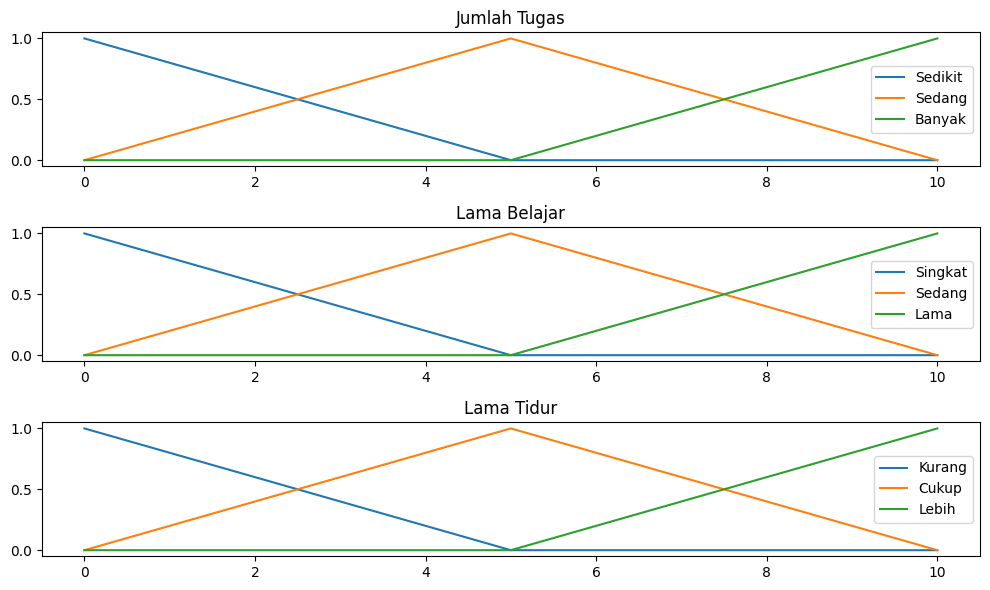

In [9]:
# Visualisasi variabel fuzzy
plt.figure(figsize=(10, 6))

# Jumlah Tugas
plt.subplot(3, 1, 1)
plt.plot(jumlah_tugas, jumlah_tugas_sedikit, label='Sedikit')
plt.plot(jumlah_tugas, jumlah_tugas_sedang, label='Sedang')
plt.plot(jumlah_tugas, jumlah_tugas_banyak, label='Banyak')
plt.title('Jumlah Tugas')
plt.legend()

# Lama Belajar
plt.subplot(3, 1, 2)
plt.plot(lama_belajar, lama_belajar_singkat, label='Singkat')
plt.plot(lama_belajar, lama_belajar_sedang, label='Sedang')
plt.plot(lama_belajar, lama_belajar_lama, label='Lama')
plt.title('Lama Belajar')
plt.legend()

# Lama Tidur
plt.subplot(3, 1, 3)
plt.plot(lama_tidur, lama_tidur_kurang, label='Kurang')
plt.plot(lama_tidur, lama_tidur_cukup, label='Cukup')
plt.plot(lama_tidur, lama_tidur_lebih, label='Lebih')
plt.title('Lama Tidur')
plt.legend()

plt.tight_layout()
plt.show()
